In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from decimal import Decimal

# Loading The Train-Test csv files

In [2]:
train_data=pd.read_csv("kaggle_titanic_train.csv",delimiter=",")
test_data= pd.read_csv("kaggle_titanic_test.csv",delimiter=",")
train_data.shape

(891, 12)

In [3]:
Passengers_test= test_data['PassengerId']

In [4]:
Passengers_test.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [5]:
cols=train_data.columns.tolist()
cols= cols[-10:]+ cols[:-10]
cols
train_data= train_data[cols]
train_data.head()           

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,0


In [6]:
X_train=train_data.iloc[:,:] # actually x_y_train!
Y_train=train_data.iloc[:,11:]
X_train.shape , Y_train.shape

((891, 12), (891, 1))

# Checking if the X_train dataframe consists of any null values

In [7]:
X_train.isnull().sum()

Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [8]:
X_train.columns.tolist()

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'PassengerId',
 'Survived']

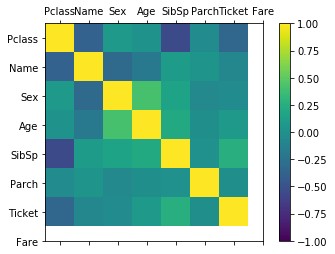

In [9]:
import matplotlib.pyplot as plt
import pandas
import numpy
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#data = pandas.read_csv(url, names=names)
correlations = X_train.corr()
names= X_train.columns.tolist()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [10]:
X_train.drop('PassengerId',axis=1,inplace=True)
X_train.drop('Name',axis=1,inplace=True)
X_train.drop('Ticket',axis=1,inplace=True)
X_train.drop('Cabin',axis=1,inplace=True)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


# Analysing the Age column for a better understanding

In [11]:
male_survive_age = X_train[X_train.Sex=='male'][X_train.Survived==1].Age.median() # median age of male who survived
female_survive_age=X_train[X_train.Sex=='female'][X_train.Survived==1].Age.median()
male_died=X_train[X_train.Sex=='male'][X_train.Survived==0].Age.median()
female_died=X_train[X_train.Sex=='female'][X_train.Survived==0].Age.median()
female_died


C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


24.5

In [12]:
#kkn

In [13]:
X_train[X_train.Survived==1][X_train.Sex=='male'].isnull().sum() # men who survived
X_train[X_train.Survived==0][X_train.Sex=='male'].isnull().sum() # men who died
X_train[X_train.Survived==1][X_train.Sex=='female'].isnull().sum() # female who survived
X_train[X_train.Survived==0][X_train.Sex=='female'].isnull().sum() # female who died

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Pclass       0
Sex          0
Age         17
SibSp        0
Parch        0
Fare         0
Embarked     0
Survived     0
dtype: int64

In [14]:
df1=X_train[X_train.Survived==0][X_train.Sex=='female'] # female died
df1.isnull().sum()
df1.Age.fillna(female_died, inplace=True)
df1.isnull().sum()

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [15]:
df2=X_train[X_train.Survived==0][X_train.Sex=='male'] # male died
df2.isnull().sum()
df2.Age.fillna(male_died, inplace=True)
df2.isnull().sum()

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [16]:
df3=X_train[X_train.Survived==1][X_train.Sex=='male'] # male survived
df3.isnull().sum()
df3.Age.fillna(male_survive_age, inplace=True)
df3.isnull().sum()

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [17]:
df4=X_train[X_train.Survived==1][X_train.Sex=='female'] # male died
df4.isnull().sum()
df4.Age.fillna(female_survive_age, inplace=True)
df4.isnull().sum()

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

# Replaced the Nan values of age with median age of men/women who survived or died

In [18]:
import pandas as pd
X_Y_train= pd.concat([df1,df2,df3,df4])
X_Y_train=X_Y_train.reset_index(drop=True)
X_Y_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,female,14.0,0,0,7.8542,S,0
1,3,female,31.0,1,0,18.0000,S,0
2,3,female,8.0,3,1,21.0750,S,0
3,3,female,18.0,2,0,18.0000,S,0
4,3,female,40.0,1,0,9.4750,S,0


In [19]:
X_Y_train.Sex[X_Y_train.Sex == 'male'] = 0
X_Y_train.Sex[X_Y_train.Sex == 'female'] = 1
X_Y_train.Embarked[X_Y_train.Embarked == 'S']=1
X_Y_train.Embarked[X_Y_train.Embarked == 'C']=2
X_Y_train.Embarked[X_Y_train.Embarked== 'Q']=3
X_Y_train.head()

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,14.0,0,0,7.8542,1,0
1,3,1,31.0,1,0,18.0000,1,0
2,3,1,8.0,3,1,21.0750,1,0
3,3,1,18.0,2,0,18.0000,1,0
4,3,1,40.0,1,0,9.4750,1,0


In [20]:
X_Y_train.Embarked.fillna(1,inplace=True)
X_Y_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

# All Nan removed!!

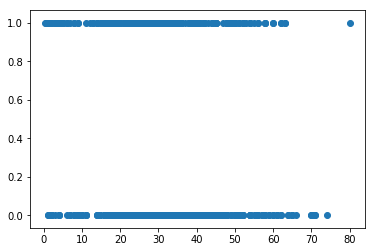

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Age'], X_train['Survived'])
plt.show()

In [22]:
# scaling the data
# afterwards

In [23]:
test_data.head()
col1=test_data.columns.tolist()
col1 =  col1[-10:]+ col1[:-10]
col1
test_data= test_data[col1]
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896


In [24]:
test_data.drop('PassengerId',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)
test_data.drop('Ticket',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [25]:
test_data.Sex[test_data.Sex == 'male'] = 0
test_data.Sex[test_data.Sex == 'female'] = 1
test_data.Embarked[test_data.Embarked == 'S']=1
test_data.Embarked[test_data.Embarked == 'C']=2
test_data.Embarked[test_data.Embarked== 'Q']=3
test_data.head()

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


In [26]:
# test_data.Sex[test_data.Sex == 'male'] = 0
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [27]:
A2 = test_data.Fare.mean()
test_data.Fare.fillna(A2,inplace=True)
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

# Preparing Test data

In [28]:
test_data.Age.fillna(27,inplace=True)
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Train-Test split for testing various classifiers

In [29]:
X_train2= X_Y_train.iloc[:,:7] # actually x_y_train!
Y_train2= X_Y_train.iloc[:,7:]
X_Y_train.shape

(891, 8)

In [30]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train2,Y_train2,test_size=0.2)
x_train1.shape,y_train1.shape

((712, 7), (712, 1))

# Logistic Regression

In [45]:
titanic=LogisticRegression()
titanic.fit(x_train1,y_train1)
titanic.score(x_test1,y_test1)
#titanic.predict(test_data)
#Y_pred=titanic.predict(test_data)
#np.savetxt("logistic_pred.csv",Y_pred,delimiter=",")

C:\Users\shubham saksham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8044692737430168

# Gradient boosting classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()

gbc.fit(x_train1,y_train1)
gbc.score(x_test1,y_test1)
#gbc.predict(test_data)

C:\Users\shubham saksham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.86033519553072624

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train1,y_train1)
rfc.score(x_test1,y_test1)
#rfc.predict(test_data)

C:\Users\shubham saksham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.83240223463687146

# SVM classifier

In [48]:
from sklearn.svm import SVC
clf= SVC()
clf.fit(x_train1,y_train1)
clf.score(x_test1,y_test1)
#clf.predict(test_data)

C:\Users\shubham saksham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.71508379888268159

In [35]:
rfc.predict(test_data)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0,

# Saving results

In [36]:
import pandas as pd
#Y_pred=rfc.predict(test_data)
#np.savetxt("logistic_pred.csv",Y_pred,delimiter=",")
results=pd.concat([Passengers_test,pd.DataFrame(gbc.predict(test_data))],axis=1)

In [37]:
results.to_csv('random_forest.csv',index=False)

# Experiment! Let's try implementing a sequential model neural network.

In [38]:
from keras.models import Sequential

Using TensorFlow backend.


In [39]:
model= Sequential()

In [40]:
from keras.layers import Dense, Dropout

layer1= Dense(units= 15, activation='relu', input_dim=7)
model.add(layer1)  # 1st layer added

model.add(Dropout(0.50)) # dropout layer added

model.add(Dense(units=10,activation='relu')) # 2nd layer added

model.add(Dropout(0.25)) # dropout layer added

#model.add(Dense(units=10,activation='relu')) # 3rd layer added

#model.add(Dropout(0.20)) # dropout layer added

model.add(Dense(units=1,activation='sigmoid')) # output layer added

In [41]:
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history= model.fit(x_train1,y_train1,epochs=100, batch_size=1, validation_data=(x_test1,y_test1))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 3s 4ms/step - loss: 1.6317 - acc: 0.5787 - val_loss: 0.6689 - val_acc: 0.6313
Epoch 2/100
712/712 [==============================] - 1s 2ms/step - loss: 0.9909 - acc: 0.6096 - val_loss: 0.6236 - val_acc: 0.6927
Epoch 3/100
712/712 [==============================] - 1s 2ms/step - loss: 0.7912 - acc: 0.6081 - val_loss: 0.6392 - val_acc: 0.7095
Epoch 4/100
712/712 [==============================] - 1s 2ms/step - loss: 0.7074 - acc: 0.5885 - val_loss: 0.6084 - val_acc: 0.6704
Epoch 5/100
712/712 [==============================] - 1s 2ms/step - loss: 0.6871 - acc: 0.6124 - val_loss: 0.6204 - val_acc: 0.6425
Epoch 6/100
712/712 [==============================] - 1s 2ms/step - loss: 0.6461 - acc: 0.6039 - val_loss: 0.6000 - val_acc: 0.6425
Epoch 7/100
712/712 [==============================] - 1s 2ms/step - loss: 0.6395 - acc: 0.6138 - val_loss: 0.6055 - val_acc: 0.6425
Epoch 8/100
712/712 [==

Epoch 62/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4831 - acc: 0.7640 - val_loss: 0.4518 - val_acc: 0.7877
Epoch 63/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4915 - acc: 0.7584 - val_loss: 0.4496 - val_acc: 0.7765
Epoch 64/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4822 - acc: 0.7781 - val_loss: 0.4717 - val_acc: 0.7989
Epoch 65/100
712/712 [==============================] - 1s 2ms/step - loss: 0.4990 - acc: 0.7683 - val_loss: 0.4486 - val_acc: 0.7877
Epoch 66/100
712/712 [==============================] - 1s 2ms/step - loss: 0.5078 - acc: 0.7542 - val_loss: 0.4717 - val_acc: 0.8156
Epoch 67/100
712/712 [==============================] - 1s 1ms/step - loss: 0.5009 - acc: 0.7528 - val_loss: 0.4531 - val_acc: 0.7765
Epoch 68/100
712/712 [==============================] - 1s 2ms/step - loss: 0.5062 - acc: 0.7711 - val_loss: 0.4448 - val_acc: 0.7933
Epoch 69/100
712/712 [==============================] - 1s 2ms

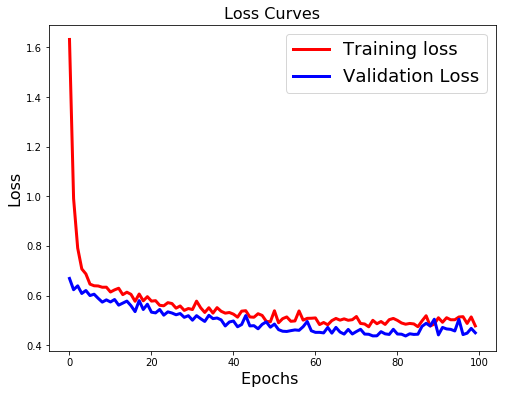

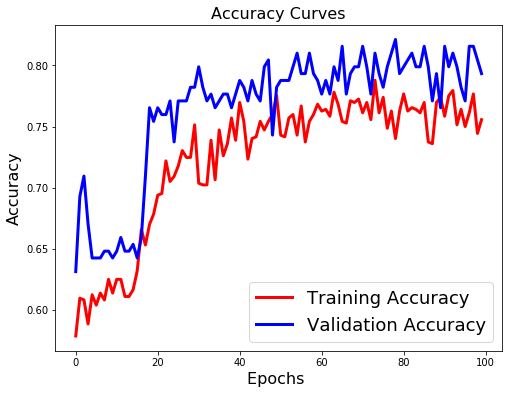

In [43]:
import matplotlib.pyplot as plt
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

In [44]:
model.predict(test_data)

array([[ 0.17504771],
       [ 0.2310701 ],
       [ 0.09222458],
       [ 0.18421204],
       [ 0.33941224],
       [ 0.28704819],
       [ 0.71822256],
       [ 0.22986452],
       [ 0.6829564 ],
       [ 0.17079878],
       [ 0.18143509],
       [ 0.23441808],
       [ 0.95603186],
       [ 0.12255057],
       [ 0.93266976],
       [ 0.87928301],
       [ 0.22795254],
       [ 0.21193042],
       [ 0.33272308],
       [ 0.35585296],
       [ 0.25961345],
       [ 0.5284369 ],
       [ 0.9455446 ],
       [ 0.56415206],
       [ 0.98169035],
       [ 0.10018791],
       [ 0.96549869],
       [ 0.20606606],
       [ 0.26489738],
       [ 0.15263397],
       [ 0.15962185],
       [ 0.22838639],
       [ 0.28615037],
       [ 0.32727554],
       [ 0.35455164],
       [ 0.22795695],
       [ 0.43004414],
       [ 0.50185651],
       [ 0.19458908],
       [ 0.39182293],
       [ 0.14823379],
       [ 0.3037475 ],
       [ 0.13718542],
       [ 0.80100107],
       [ 0.93126023],
       [ 0